In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [95]:
df = pd.read_csv('./car data.csv')

## Basic EDA

In [96]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [97]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [99]:
df.shape

(301, 9)

In [100]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## DATA CLEANING

In [101]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

## Observation: There are no null values

In [102]:
df[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [103]:
# Deleting Duplicated Rows
df.drop_duplicates(inplace=True)
df.reset_index(drop=True , inplace=True)
df.shape

(299, 9)

## Observation : There was Duplicated vales in index 17 and 93 and we removed them

## Handling Outliers

<Axes: >

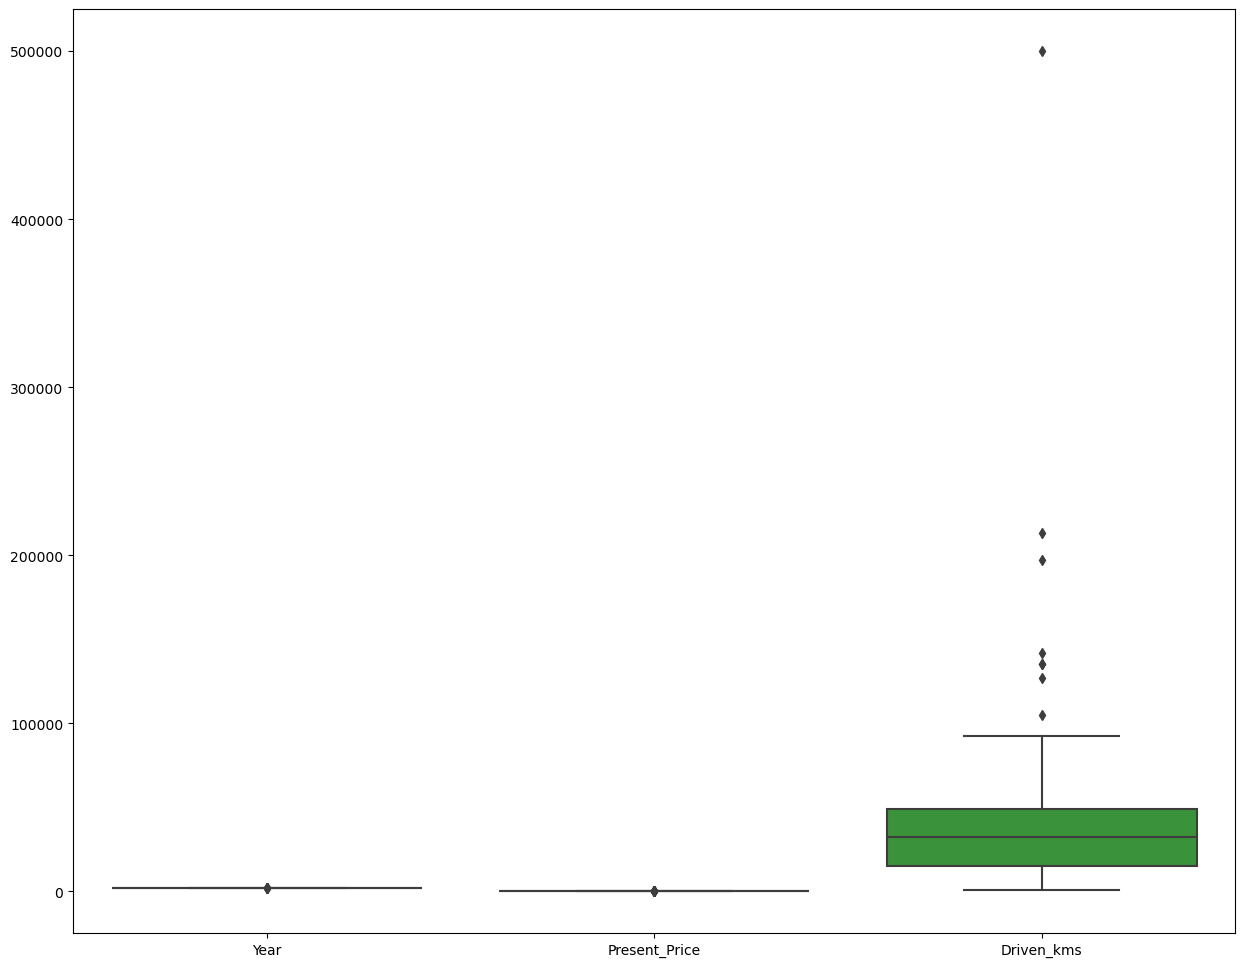

In [104]:
plt.figure(figsize=(15,12)) # Set the Width & Height
sns.boxplot(data=df[['Year','Present_Price','Driven_kms']])

## Observation : There are Outliers in Driven_kms

In [105]:
# Detecting Actual Values of Outliers
def detect_outliers_iqr(data):
    outlier_list = []
    
    # Drop missing values
    data = data.dropna()
    
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    IQR = q3 - q1
    
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    
    for i in data: 
        if (i < lwr_bound or i > upr_bound):
            outlier_list.append(i)
    
    return outlier_list 

# Assuming df is your DataFrame
for i in ['Driven_kms']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in", i, "attribute:", outliers)

Outliers in Driven_kms attribute: [127000, 104707, 135000, 135154, 197176, 142000, 213000, 500000]


In [106]:
# Remove Outlier
def handle_outliers(data):
    # Compute percentiles
    tenth_percentile = np.percentile(data.dropna(), 10)
    ninetieth_percentile = np.percentile(data.dropna(), 90)
    
    # Handle outliers by capping
    data = np.where(data < tenth_percentile, tenth_percentile, data)
    data = np.where(data > ninetieth_percentile, ninetieth_percentile, data)
    
    return data

# Assuming df is your DataFrame
for i in ['Driven_kms']:
    df[i] = handle_outliers(df[i])

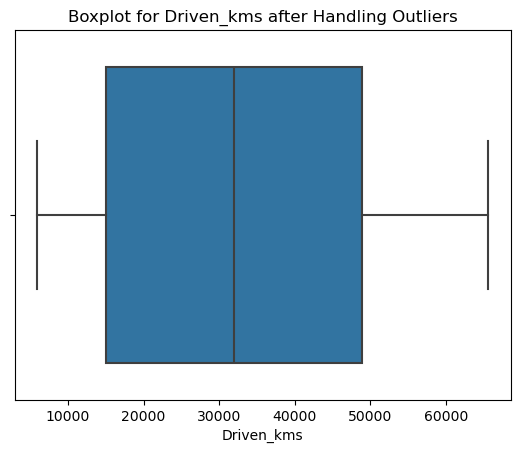

In [107]:
sns.boxplot(x=df['Driven_kms'])
plt.title('Boxplot for Driven_kms after Handling Outliers')
plt.show()

# Univarent Analysis

In [108]:
df['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                    10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

## Observation : There are cars with total 98 car names  with highest city cars

<Axes: xlabel='Car_Name', ylabel='count'>

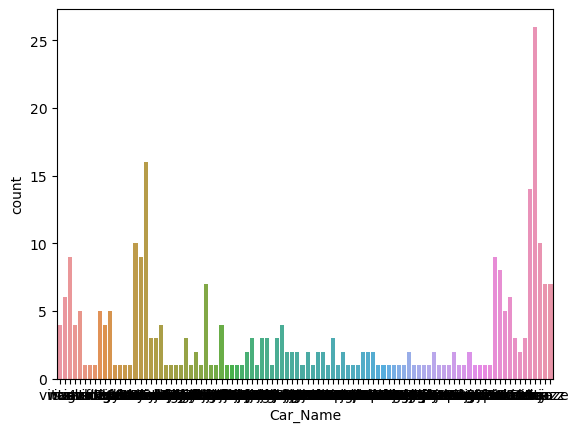

In [109]:
sns.countplot(x= df['Car_Name'])

<Axes: xlabel='Fuel_Type', ylabel='count'>

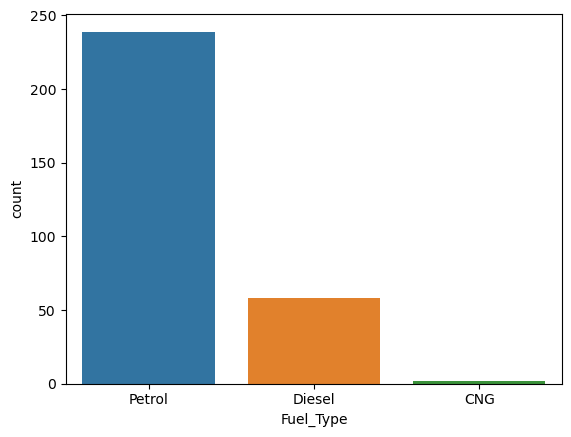

In [110]:
sns.countplot(x= df['Fuel_Type'])

## There are more petrol cars in this dataset

<Axes: xlabel='Selling_type', ylabel='count'>

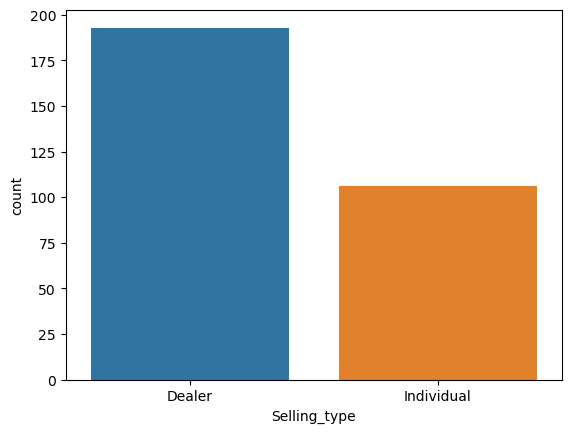

In [111]:
sns.countplot(x= df['Selling_type'])

## There are more Seller_type Dealer in this dataset

<Axes: xlabel='Transmission', ylabel='count'>

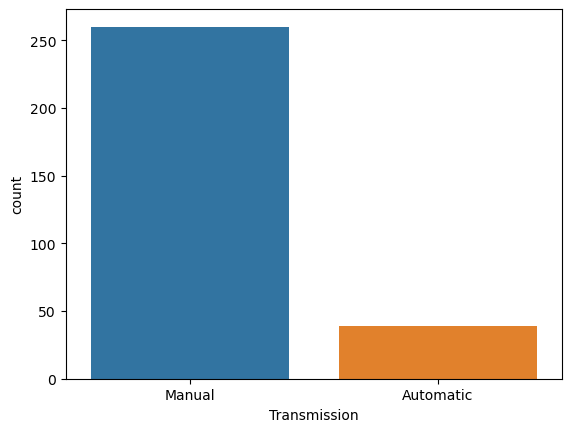

In [112]:
sns.countplot(x= df['Transmission'])

## There are more Manual cars in this dataset

<Axes: xlabel='Owner', ylabel='count'>

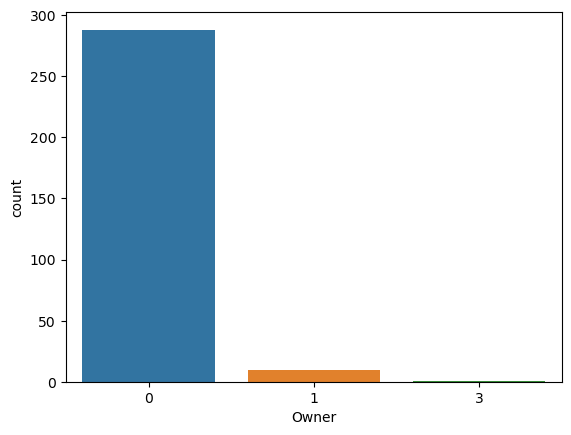

In [113]:
sns.countplot(x= df['Owner'])

## There are more  cars with 0 owners in this dataset

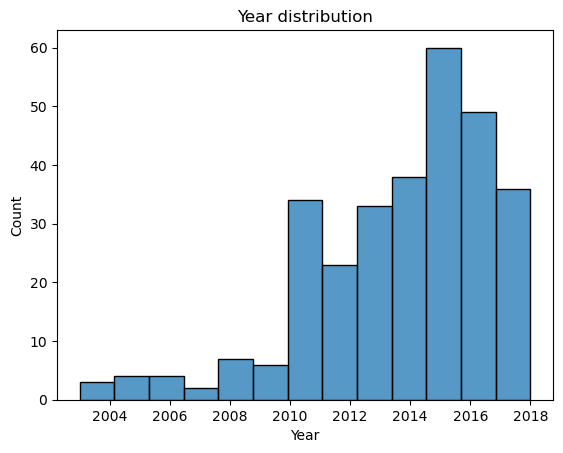

In [114]:
sns.histplot(df.Year)
plt.title('Year distribution')
plt.show()

## There are more latest cars in this dataset in range of 2010 to 2018

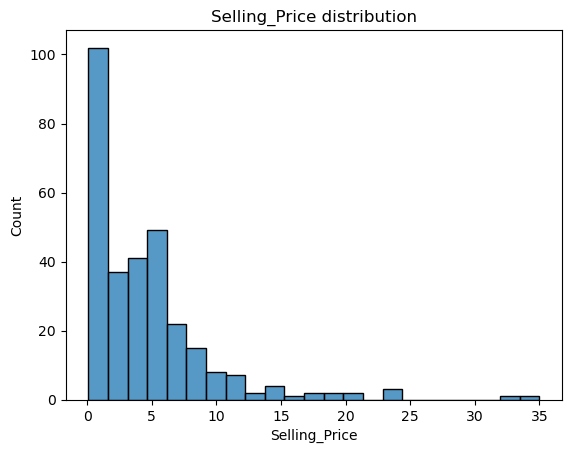

In [115]:
sns.histplot(df.Selling_Price)
plt.title('Selling_Price distribution')
plt.show()

## There are more  cars with selling price of 0 to 15 units in this dataset

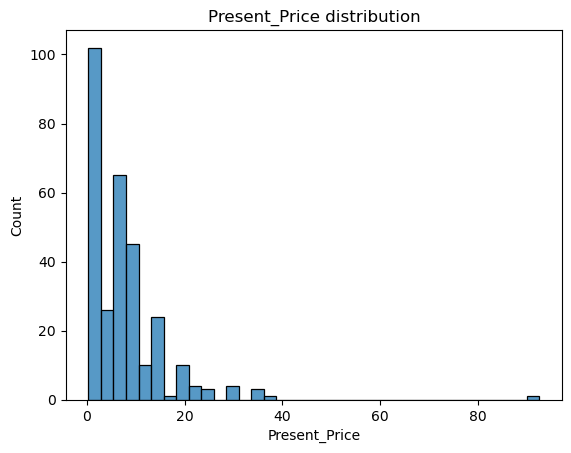

In [116]:
sns.histplot(df.Present_Price)
plt.title('Present_Price distribution')
plt.show()

## There are more  cars with present price of 0 to 20 units in this dataset

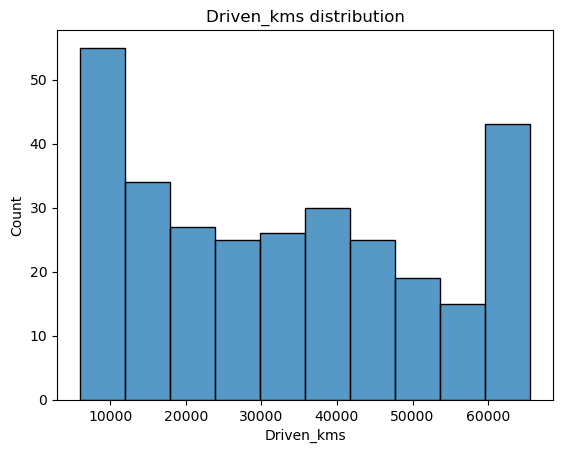

In [117]:
sns.histplot(df.Driven_kms)
plt.title('Driven_kms distribution')
plt.show()

## There is uniform distribution of Driven kms in this dataset

# Bivarient Analysis

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

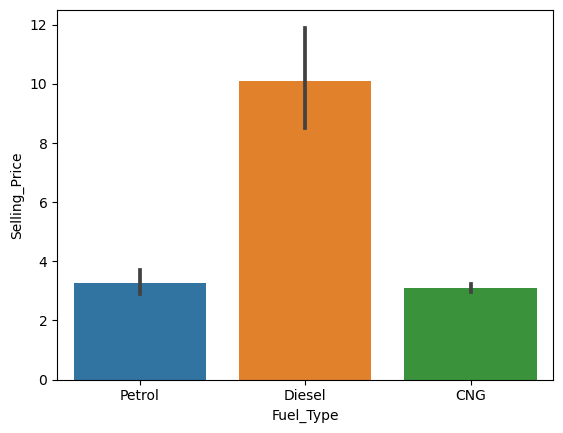

In [118]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=df) 

# Cars with Fuel Type Diesel have greater selling price

<Axes: xlabel='Selling_type', ylabel='Selling_Price'>

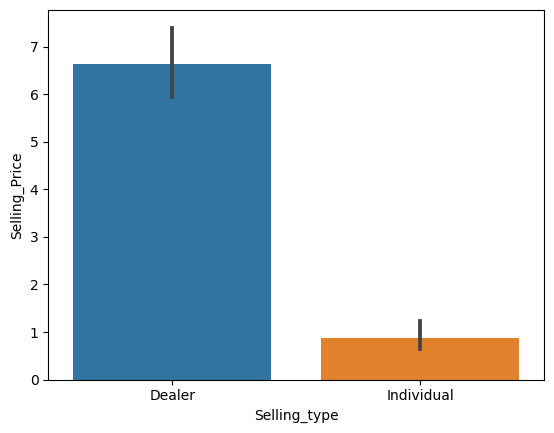

In [119]:
sns.barplot(x='Selling_type',y='Selling_Price',data=df)

# Cars with Selling_type Dealer have greater selling price

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

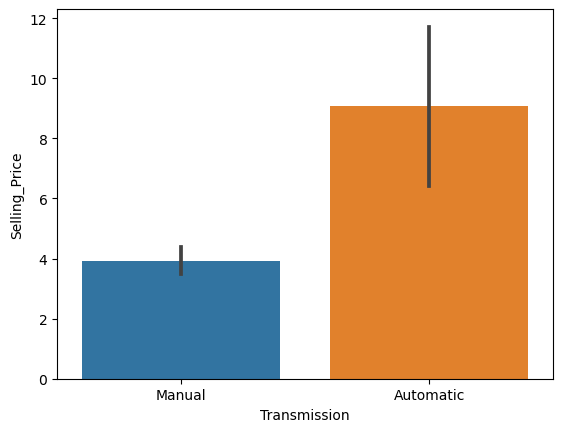

In [120]:
sns.barplot(x='Transmission',y='Selling_Price',data=df)

# Automatic Cars have greater Selling price

# Applyling Encoding

In [121]:
from sklearn.preprocessing import LabelEncoder

In [122]:
df['Fuel_Type'] = LabelEncoder().fit_transform(df['Fuel_Type'])
df['Selling_type'] = LabelEncoder().fit_transform(df['Selling_type'])
df['Transmission'] = LabelEncoder().fit_transform(df['Transmission'])
df['Car_Name'] = LabelEncoder().fit_transform(df['Car_Name'])

In [123]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000.0,2,0,1,0
1,93,2013,4.75,9.54,43000.0,1,0,1,0
2,68,2017,7.25,9.85,6900.0,2,0,1,0
3,96,2011,2.85,4.15,5940.0,2,0,1,0
4,92,2014,4.60,6.87,42450.0,1,0,1,0


# Multivarient Analysis

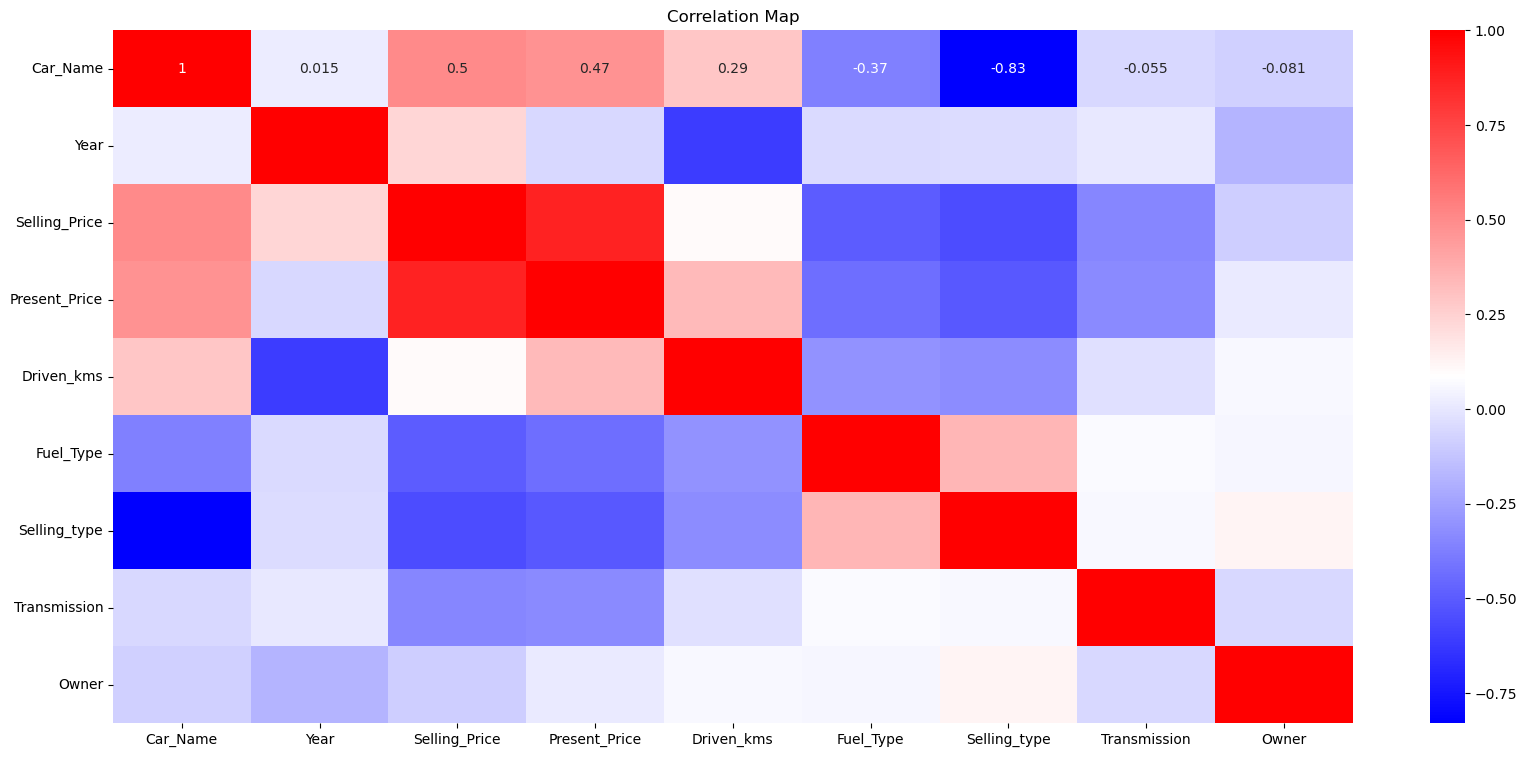

In [124]:
plt.figure(figsize=(20,9))
sns.heatmap(df.corr(), annot=True, cmap='bwr')
plt.title("Correlation Map")
plt.show()

In [125]:
df.corr()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Car_Name,1.000000,0.014713,0.501429,0.474651,0.289576,-0.368454,-0.829255,-0.055072,-0.080579
Year,0.014713,1.000000,0.234369,-0.053167,-0.610392,-0.046210,-0.036820,0.003434,-0.181639
Selling_Price,0.501429,0.234369,1.000000,0.876305,0.104854,-0.500292,-0.553851,-0.348869,-0.087880
Present_Price,0.474651,-0.053167,0.876305,1.000000,0.333034,-0.431887,-0.511779,-0.334326,0.009948
Driven_kms,0.289576,-0.610392,0.104854,0.333034,1.000000,-0.303327,-0.327667,-0.027433,0.058534
Fuel_Type,-0.368454,-0.046210,-0.500292,-0.431887,-0.303327,1.000000,0.347922,0.068618,0.054174
Selling_type,-0.829255,-0.036820,-0.553851,-0.511779,-0.327667,0.347922,1.000000,0.058669,0.123646
Transmission,-0.055072,0.003434,-0.348869,-0.334326,-0.027433,0.068618,0.058669,1.000000,-0.052166
Owner,-0.080579,-0.181639,-0.087880,0.009948,0.058534,0.054174,0.123646,-0.052166,1.000000


# Data Splitting For Simple Linear Regression

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X = df[['Present_Price']]
y = df['Selling_Price']
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Applying Linear Regression

In [128]:
from sklearn.linear_model import LinearRegression

In [129]:
model = LinearRegression()

In [130]:
model.fit(X_train,y_train)

LinearRegression()

In [131]:
model.coef_ , model.intercept_

(array([0.49533359]), 0.7538976173408134)

In [132]:
model.predict(X_test)

array([13.33041746,  1.03623776,  3.27514559,  2.7104653 ,  9.98691573,
        3.57729908,  7.49043444,  1.15511783,  5.62302681,  5.6775135 ,
        3.57729908,  4.7660997 ,  5.35554667,  3.71599248, 18.56609351,
        1.16997783,  3.57729908,  7.49043444,  1.1105378 ,  1.44736464,
        1.48203799,  4.72151967,  1.03623776,  4.12216603,  4.22123275,
        5.65770016,  0.91240437,  5.41003336,  5.70723352, 10.88346953,
        4.5184329 ,  4.12216603,  7.68856788,  3.03243213,  2.61635192,
        4.11721269,  3.03243213,  1.16007116,  7.55978114,  4.5184329 ,
        7.49043444,  4.1320727 ,  4.5184329 ,  1.24427787,  4.22123275,
        1.33343792,  4.6422663 ,  1.21951119,  4.5877796 ,  2.46775184,
        5.68246684,  3.75066584,  1.02137776,  9.97205572, 18.56609351,
        4.46889954,  1.48203799, 15.9160588 ,  5.17227324,  1.12044447])

In [133]:
y_test

94     20.75
196     0.15
17      3.25
19      2.85
95     17.00
212     5.25
248    12.90
143     0.60
5       9.25
12      7.50
207     4.85
206     7.90
48      7.75
29      3.10
58     19.99
127     0.78
203     5.25
274     8.65
172     0.38
111     1.15
107     1.20
21      4.40
189     0.20
292     3.75
257     3.90
251     7.20
193     0.18
229     9.25
268     4.10
97      9.65
247     5.25
272     5.30
280     8.25
201     2.95
37      3.00
227     3.10
208     3.10
129     0.75
86      5.90
220     6.00
210    11.25
250     5.40
279     2.10
142     0.60
264     3.65
120     1.05
80      4.75
147     0.51
34      2.95
22      2.50
32      6.00
87      3.45
163     0.45
71      7.45
61     18.75
271     2.25
102     1.35
49     14.90
9       7.45
133     0.65
Name: Selling_Price, dtype: float64

In [134]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [135]:
my_linear_preds_train = model.predict(X_train)
print('MAE on Train Data :', mean_absolute_error(my_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_linear_preds_train,y_train)))
print('R-squared on Train Data :', model.score(X_train, y_train))

MAE on Train Data : 1.509008455185005
MSE on Train Data : 6.159359041523701
RMSE on Train Data : 2.481805601074287
R-squared on Train Data : 0.7500204324824026


In [136]:
my_model_preds = model.predict(X_test)
print('MAE on Train Data :', mean_absolute_error(my_model_preds,y_test))
print('MSE on Train Data :', mean_squared_error(my_model_preds,y_test))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_model_preds,y_test)))
print('R-squared on Train Data :', model.score(X_test, y_test))

MAE on Train Data : 1.362767735476754
MSE on Train Data : 4.228783939952871
RMSE on Train Data : 2.056400724555618
R-squared on Train Data : 0.8267602180022049


# Data Splitting For Multiple Linear Regression

In [137]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [138]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(224, 8)
(75, 8)
(224,)
(75,)


In [139]:
my_multiple_linear_model = LinearRegression()

In [140]:
my_multiple_linear_model.fit(X_train,y_train)

LinearRegression()

In [141]:
my_multiple_linear_model.coef_ , my_multiple_linear_model.intercept_

(array([-5.65612654e-03,  2.71129915e-01,  4.44773386e-01, -4.12458040e-05,
        -1.82355810e+00, -1.88293277e+00, -1.35415641e+00, -8.19150962e-01]),
 -537.8474093711089)

In [142]:
my_multiple_linear_model.predict(X_test)

array([ 3.26771565,  5.81314775,  2.28605787,  0.97009096,  5.99124517,
        1.36891497, -3.29633664,  0.88939743,  4.50753765,  8.26859304,
        4.42719855,  1.29546104, -0.57451073,  7.36364653,  8.2555819 ,
        3.8354565 , 14.73088523,  2.45707083,  1.92666487,  8.11384521,
       14.68126009, -2.52310031,  7.04504688, -0.4713916 ,  2.44656213,
        0.08542676,  0.44522094,  4.78248575,  0.62171336,  2.00989086,
        5.41040408,  0.78157224,  2.752081  ,  1.7245151 ,  0.60645742,
        0.79650301,  4.47131131,  6.55252686,  0.05748889,  0.3448797 ,
        4.2411209 ,  7.51025997,  9.95897085,  8.23565428,  8.23760613,
       -0.1131545 ,  1.29342455,  0.82988218, -3.35003734,  5.02585994,
        2.18921214,  1.94683332, -0.48030759,  4.04500856,  0.27691903,
        4.80664083,  2.31438713,  9.16161033,  7.90466965,  4.25613285,
        3.20305273,  3.23567208,  4.11859955,  6.36566823,  1.37065781,
        1.20963877, 19.21486039,  9.70483397,  2.28102077,  6.12

In [143]:
y_test

24      3.00
64      4.75
102     1.35
170     0.40
285     5.75
       ...  
106     1.20
80      4.75
210    11.25
196     0.15
271     2.25
Name: Selling_Price, Length: 75, dtype: float64

In [144]:
my_multiple_linear_preds_train = my_multiple_linear_model.predict(X_train)
print('MAE on Train Data :', mean_absolute_error(my_multiple_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_multiple_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds_train,y_train)))
print('R-squared on Train Data :', my_multiple_linear_model.score(X_train, y_train))

MAE on Train Data : 1.1608507062889235
MSE on Train Data : 3.000632169350918
RMSE on Train Data : 1.7322332895285548
R-squared on Train Data : 0.8881388084687911


In [145]:
my_multiple_linear_preds = my_multiple_linear_model.predict(X_test)
print('MAE on Train Data :', mean_absolute_error(my_multiple_linear_preds,y_test))
print('MSE on Train Data :', mean_squared_error(my_multiple_linear_preds,y_test))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds,y_test)))
print('R-squared on Train Data :', my_multiple_linear_model.score(X_test, y_test))

MAE on Train Data : 1.1619982976871055
MSE on Train Data : 2.747100856777062
RMSE on Train Data : 1.6574380401019706
R-squared on Train Data : 0.8449326783598621


In [146]:
# HyperParameter Tunning

In [147]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 10)

In [148]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(239, 8)
(60, 8)
(239,)
(60,)


In [149]:
my_multiple_linear_model = LinearRegression()
my_multiple_linear_model.fit(X_train,y_train)

LinearRegression()

In [150]:
my_multiple_linear_preds_train = my_multiple_linear_model.predict(X_train)
print('MAE on Train Data :', mean_absolute_error(my_multiple_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_multiple_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds_train,y_train)))
print('R-squared on Train Data :', my_multiple_linear_model.score(X_train, y_train))

MAE on Train Data : 1.1341576761997996
MSE on Train Data : 2.8964147104394042
RMSE on Train Data : 1.7018856337719654
R-squared on Train Data : 0.8913550420194053


In [151]:
my_multiple_linear_preds = my_multiple_linear_model.predict(X_test)
print('MAE on Train Data :', mean_absolute_error(my_multiple_linear_preds,y_test))
print('MSE on Train Data :', mean_squared_error(my_multiple_linear_preds,y_test))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds,y_test)))
print('R-squared on Train Data :', my_multiple_linear_model.score(X_test, y_test))


MAE on Train Data : 1.228554986329826
MSE on Train Data : 3.1040547646006824
RMSE on Train Data : 1.76183278565268
R-squared on Train Data : 0.8039446895633314


In [ ]:
Age                 
Gender                
AnnualIncome        
NumberOfPurchases     
ProductCategory       
TimeSpentOnWebsite  
LoyaltyProgram        
DiscountsAvailed      
PurchaseStatus       